In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime
import datetime as dt

In [3]:
Patients =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Patients")
EDVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDVisits")
AmbulatoryVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "AmbulatoryVisits")
ReAdmissionRegistry =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "ReAdmissionRegistry")
Discharges =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Discharges")
Providers =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Providers")
EDUnique = pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDUnique")

## 71 Create a visualization on the count of patients based on primary diagnosis.

C:\Users\Puja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Puja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Puja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Puja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


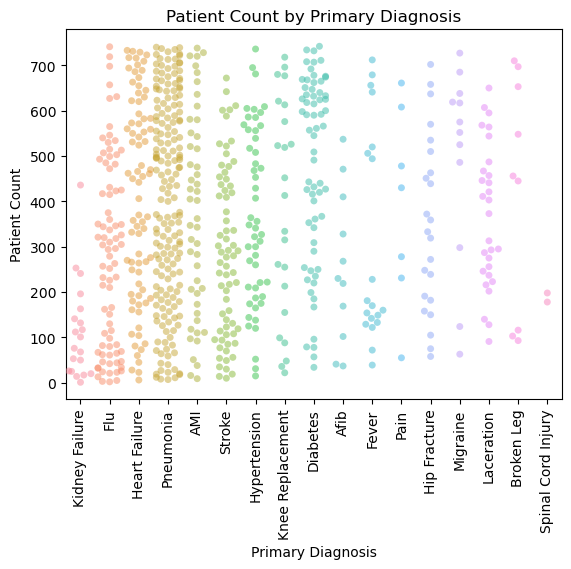

In [14]:
# Load data from ReAdmissionRegistry worksheet
df = pd.read_excel("HospitalDatabase.xlsx", sheet_name= "ReAdmissionRegistry")

df=df.sort_values(by='PatientID', ascending=True)

# Create a bar chart visualization
sns.swarmplot(x='PrimaryDiagnosis', y='PatientID', data=df, alpha=0.5)
plt.title('Patient Count by Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Patient Count')
plt.xticks(rotation=90)
plt.show()

## 72: List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [4]:
#get Surgery specialist from Providers sheet

Providers= pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Providers")
SurgerySpecialty= Providers.loc[Providers['ProviderSpecialty']=='Surgery']

#get list of patients that underwent surgery from ambulatoryvisits- based on ProviderID for Surgery speciality

AmbVisits=pd.read_excel("HospitalDatabase.xlsx", sheet_name= "AmbulatoryVisits")
Merge1=SurgerySpecialty.merge(AmbVisits, on='ProviderID', how='inner')
#print(Merge1)

#Determine surgery patients >=60yrs.
#Determine Age using DOB in Patients sheet

from datetime import datetime
import datetime as dt
Patients =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Patients")

Patients['Age']= (pd.datetime.now() - pd.to_datetime(Patients['DateOfBirth'])).astype('<m8[Y]')
SeniorPatients=Patients.loc[Patients['Age']>60]
Final_Merged=pd.merge(Merge1,SeniorPatients,left_on='PatientMRN', right_on='PatientID')
#print(Final_Merged)

#Surgery-above 60-Male Patients only

MalePatientsOnly=Final_Merged.loc[Final_Merged['Gender']=='Male']
#print(MalePatientsOnly)

#Male Patients with surgery between jan-mar 2019
#Date Range
StartDate= '2019-01-01'
EndDate= '2019-03-31'
mask = (MalePatientsOnly['DateofVisit']>StartDate) & (MalePatientsOnly['DateofVisit']<= EndDate)
Jan_Mar_2019SeniorMales=MalePatientsOnly.loc[mask]


#Names Of Male Patients
FName_LName=Jan_Mar_2019SeniorMales.loc[:,['FirstName', 'LastName']]
#print(FName_LName.head())
display(FName_LName.head())

C:\Users\Puja\AppData\Local\Temp\ipykernel_17716\2418621233.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  Patients['Age']= (pd.datetime.now() - pd.to_datetime(Patients['DateOfBirth'])).astype('<m8[Y]')


,FirstName,LastName
4,Constanta,Edgin
5,Gabriel,Saint
6,Berta,Loxly
12,Daugherty,Conner


## 75: Calculate the time spent in ED Department for each visit.

In [5]:
EDVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDVisits")
EDVisits['TimeSpent']=(pd.to_datetime(EDVisits['EDDischargeTime'])-pd.to_datetime(EDVisits['VisitDate']))
display(EDVisits)

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,TimeSpent
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,0 days 11:20:22.924000
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,0 days 23:14:20.215000
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,0 days 01:50:56.151000
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,0 days 01:20:09.793000
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted,0 days 02:38:20.043000
...,...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged,0 days 15:53:09.453000
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged,0 days 22:27:04.030000
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged,0 days 04:30:03.545000
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged,0 days 06:10:35.054000


## 77: Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

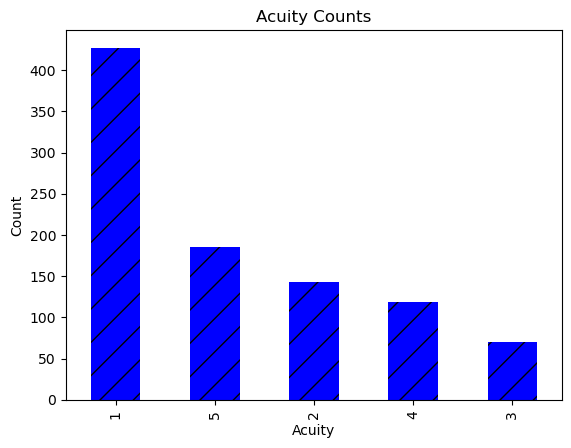

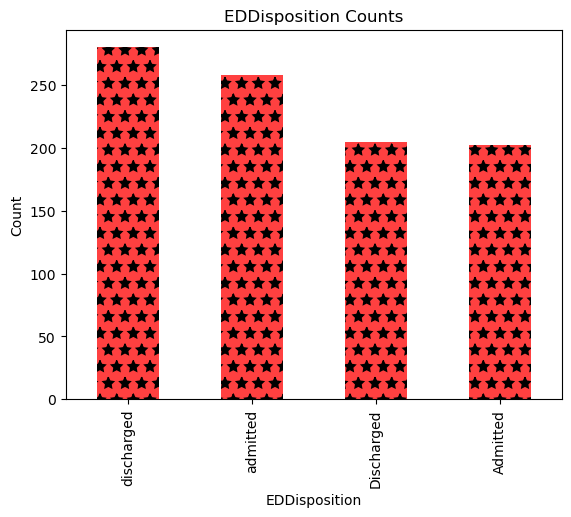

In [16]:
EDUnique = pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDUnique")

acuity_counts = EDUnique['Acuity'].value_counts()
eddisposition_counts = EDUnique['EDDisposition'].value_counts()

# Create a bar chart of the unique values in the 'Acuity' column
acuity_counts.plot(kind='bar',color='blue', hatch='/')
plt.xlabel('Acuity')
plt.ylabel('Count')
plt.title('Acuity Counts')
plt.show()

# Create a bar chart of the unique values in the 'EDDisposition' column
eddisposition_counts.plot(kind='bar', color='red',hatch='*')
plt.xlabel('EDDisposition')
plt.ylabel('Count')
plt.title('EDDisposition Counts')
plt.show()


## 78: Find reasonForVisit with highest count of acuity 5 patients.

In [7]:
EDVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDVisits")
EDVisits['Count']=1
Acuity5=EDVisits[EDVisits['Acuity']==5]

ReasonOfVisitGroup=Acuity5.groupby(['ReasonForVisit']).agg({'Count':sum})

Sort=ReasonOfVisitGroup.sort_values('Count', ascending=False)

display(Sort)

display("Reason for visit with highest Acuity count:\n ", Sort.head(1) )

,Count
ReasonForVisit,
Chest Pain,61
Shortness of Breath,46
Accident,39
Car Accident,16
Fever,16
Gun Shot,16
Pneumonia,15


'Reason for visit with highest Acuity count:\n '

,Count
ReasonForVisit,
Chest Pain,61


## 79: Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?


In [8]:
# taking data from discharges sheet
dfDischarges =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Discharges")

DischargesGroup=dfDischarges.groupby(['PrimaryDiagnosis']).agg(Min=('ExpectedLOS', 'min'), Max=('ExpectedLOS', 'max'))

DischargesGroup['Difference']=DischargesGroup['Max']-DischargesGroup['Min']

Difference_LOS = DischargesGroup.sort_values('Difference', ascending=False)

display(Difference_LOS.head(1))

,Min,Max,Difference
PrimaryDiagnosis,,,
Pneumonia,2.163953,16.998213,14.83426


## 80: Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

In [9]:
Providers =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Providers")

display(Providers.groupby(['ProviderSpecialty']).groups.keys())

dict_keys(['Cardiology', 'Pediatrics', 'PrimaryCare', 'Surgery'])